# Практика 5, ч.2

## 1. Операция свертки (convolution)

Сверкта в сверточных слоях CNNs - дискретная операция, состоящая в серии последовательных перемножений матрицы (тензора) небольшого размера - ядра свертки (kernel) и локальной области матрицы (тензора) оригинальных данных. Результат - матрица или тензор такого же или меньшего размера по обрабатываемому измерению (измерениям). 

Для выполнения операции свертки в общем случае должны выполняться определенные условия для размерностей входного тензора и тензора ядра сверкти. В случае CNN это одинаковая "глубина" (число каналов): если на входе стандартное RGB-изображение (C = 3), то и kernel должен иметь глубину 3 (здесь и далее высота = **Н**, ширина = **W**, число каналов, т.е. глубина = **С**). Также здесь и далее kernel подразумеваетя квадратной матрицей.

**Схема работы свертки с параметрами:**
- ядро (окно, фильтр) свертки (kernel size) = 3х3 (H, W), C = 1
- пэддинг (padding - дополнение по краям), здесь = 0 (значение, по умолчанию один ряд значений). Есть разные методы пэддинга.
- шаг окна (stride) = 1 (по умолчанию движение по "строкам", т.е. слева направо со шагом вниз в конце строки)


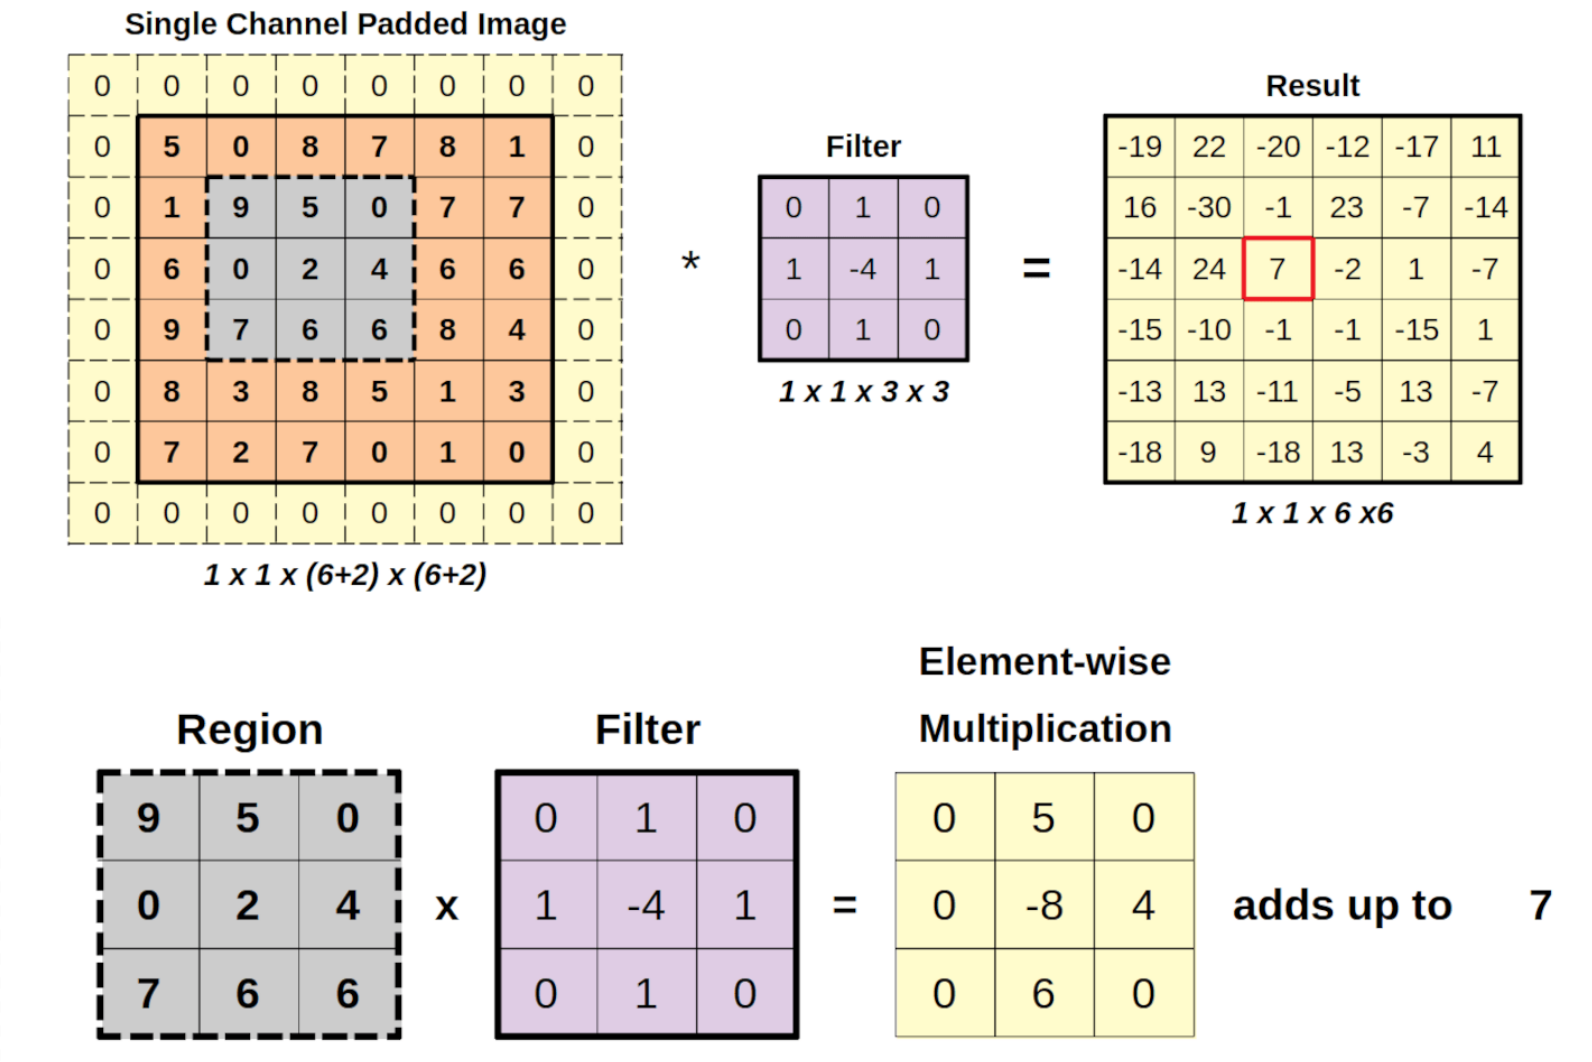

Результат примерения специфического ядра свертки, усиливающего контруы и текстуру изображения.

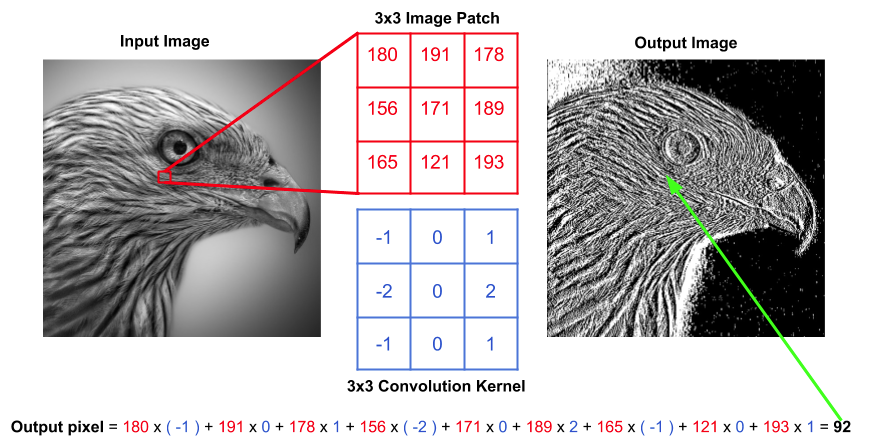

<a><a href='https://en.wikipedia.org/wiki/Convolutional_neural_network' a>Анимированная схема свертки</a> (H, W, C = 3, 3, 1, подразумевается дополнение значениями 1 по краю входной матрицы, шаг = 1). Соотношение размера kernel, размера шага и наличия или отсутствия дополнения по краям определяет размер результата.

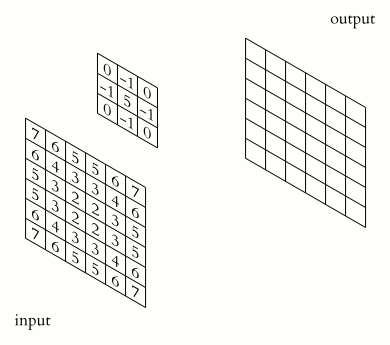
    



**Формула свертки.**  Конструирование CNN: принцип соответсвия размеров тензоров и размера принимающих слоев: для подбор параметров следующего слоя неободимо понять как размерность данных изменится при прохождении через сверточный слой с данными параметирами.

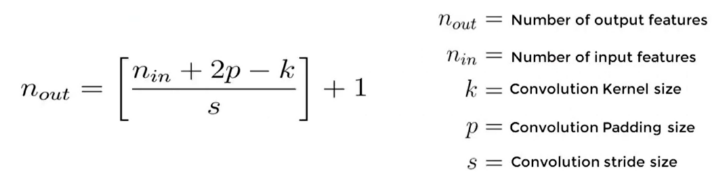

### Как формируются образы в нейронных структурах мозга (Hubel, Vizel, 1953)
Концепция "рецептивных полей" - проекций карт активацйии нейронов в следующие структуры, каскады рецептивных полей - "сжатие" и обобщение информации, выделение ключевых признаков на разных масштабах и уровнях детализации.

![img](сnn-brain.png)

Сверточные каскады CNN работаю по аналогии: проекции размеров карт активации при kernel = (3,3)

![img](conv7.png)

### Что "видят" разные слои CNN?
Визуализация карт активации слоев разной глубины GoogleNet, детальное описание, иллюстрации <a href='https://distill.pub/2017/feature-visualization/' a>здесь
    
![img](cnn_view.png)

## 2. Слои CNN

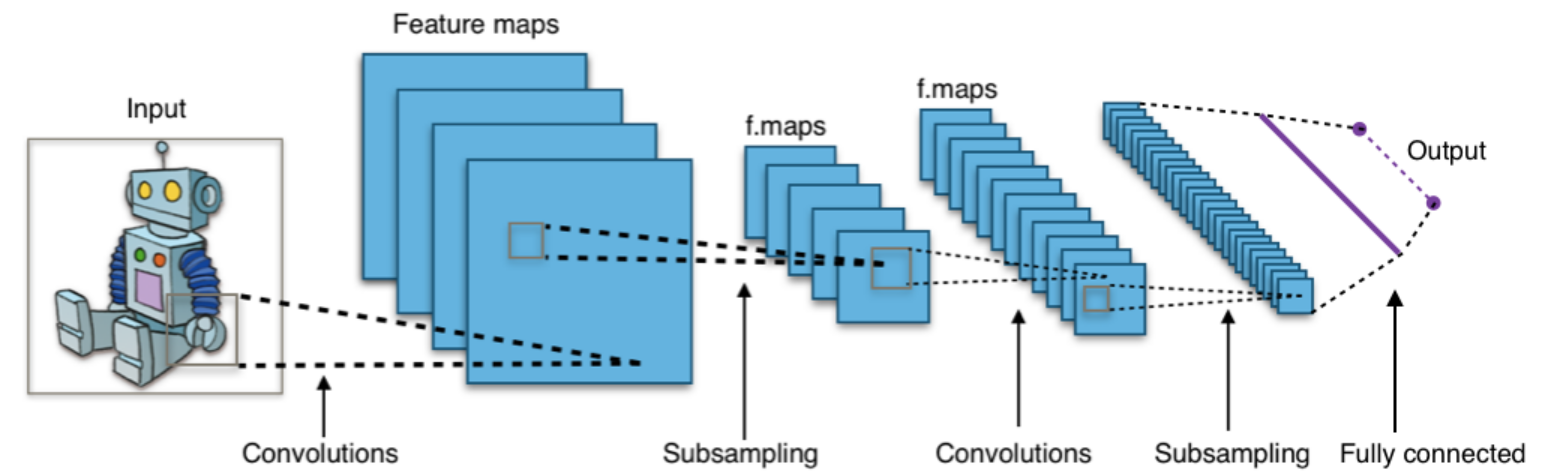

### 2.1 Полносвязный слой (Linear)
Матричное умножение тензора входных данных на веса нейронов слоя. В СNN находятся в конце (classification head) - "учат" нелинейную функцию распеределения четко отобранных сверточными слоями (фильтрами) разноуровневых пространственных признаков.

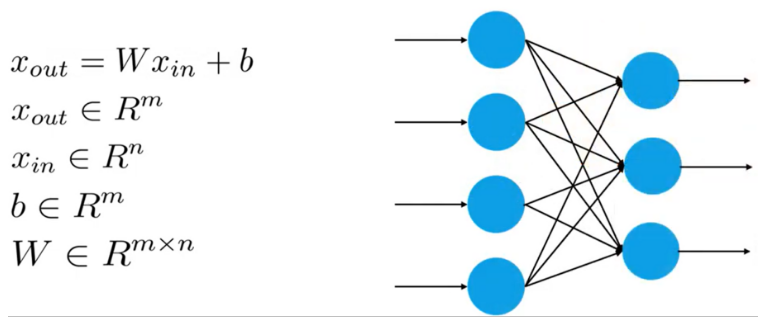

### 2.2 Сверточный слой для матриц (Conv2d)
Сами значения ядер свертки изначально инициализируюся случайноыми занчениями (по умолчанию, есть техники задания изначальных весов НС для более эффективного обучения - weight initialization). В процессе обучения значения оптимизируются (это "обучаемые" параметры). Гиперпараметры слоя: **kernel size, padding, stride, number of filters**. Число фильтров - число уникальных ядер свертки той же глубины что и входной тензор, каждое из которых на выходе дает тензор меньшего размера (зависит от параметров) и глубины 1 (матрица). Матрицы всех фильтров упаковываются в глубокий тензор (глубина соответсвует числу фильтров).

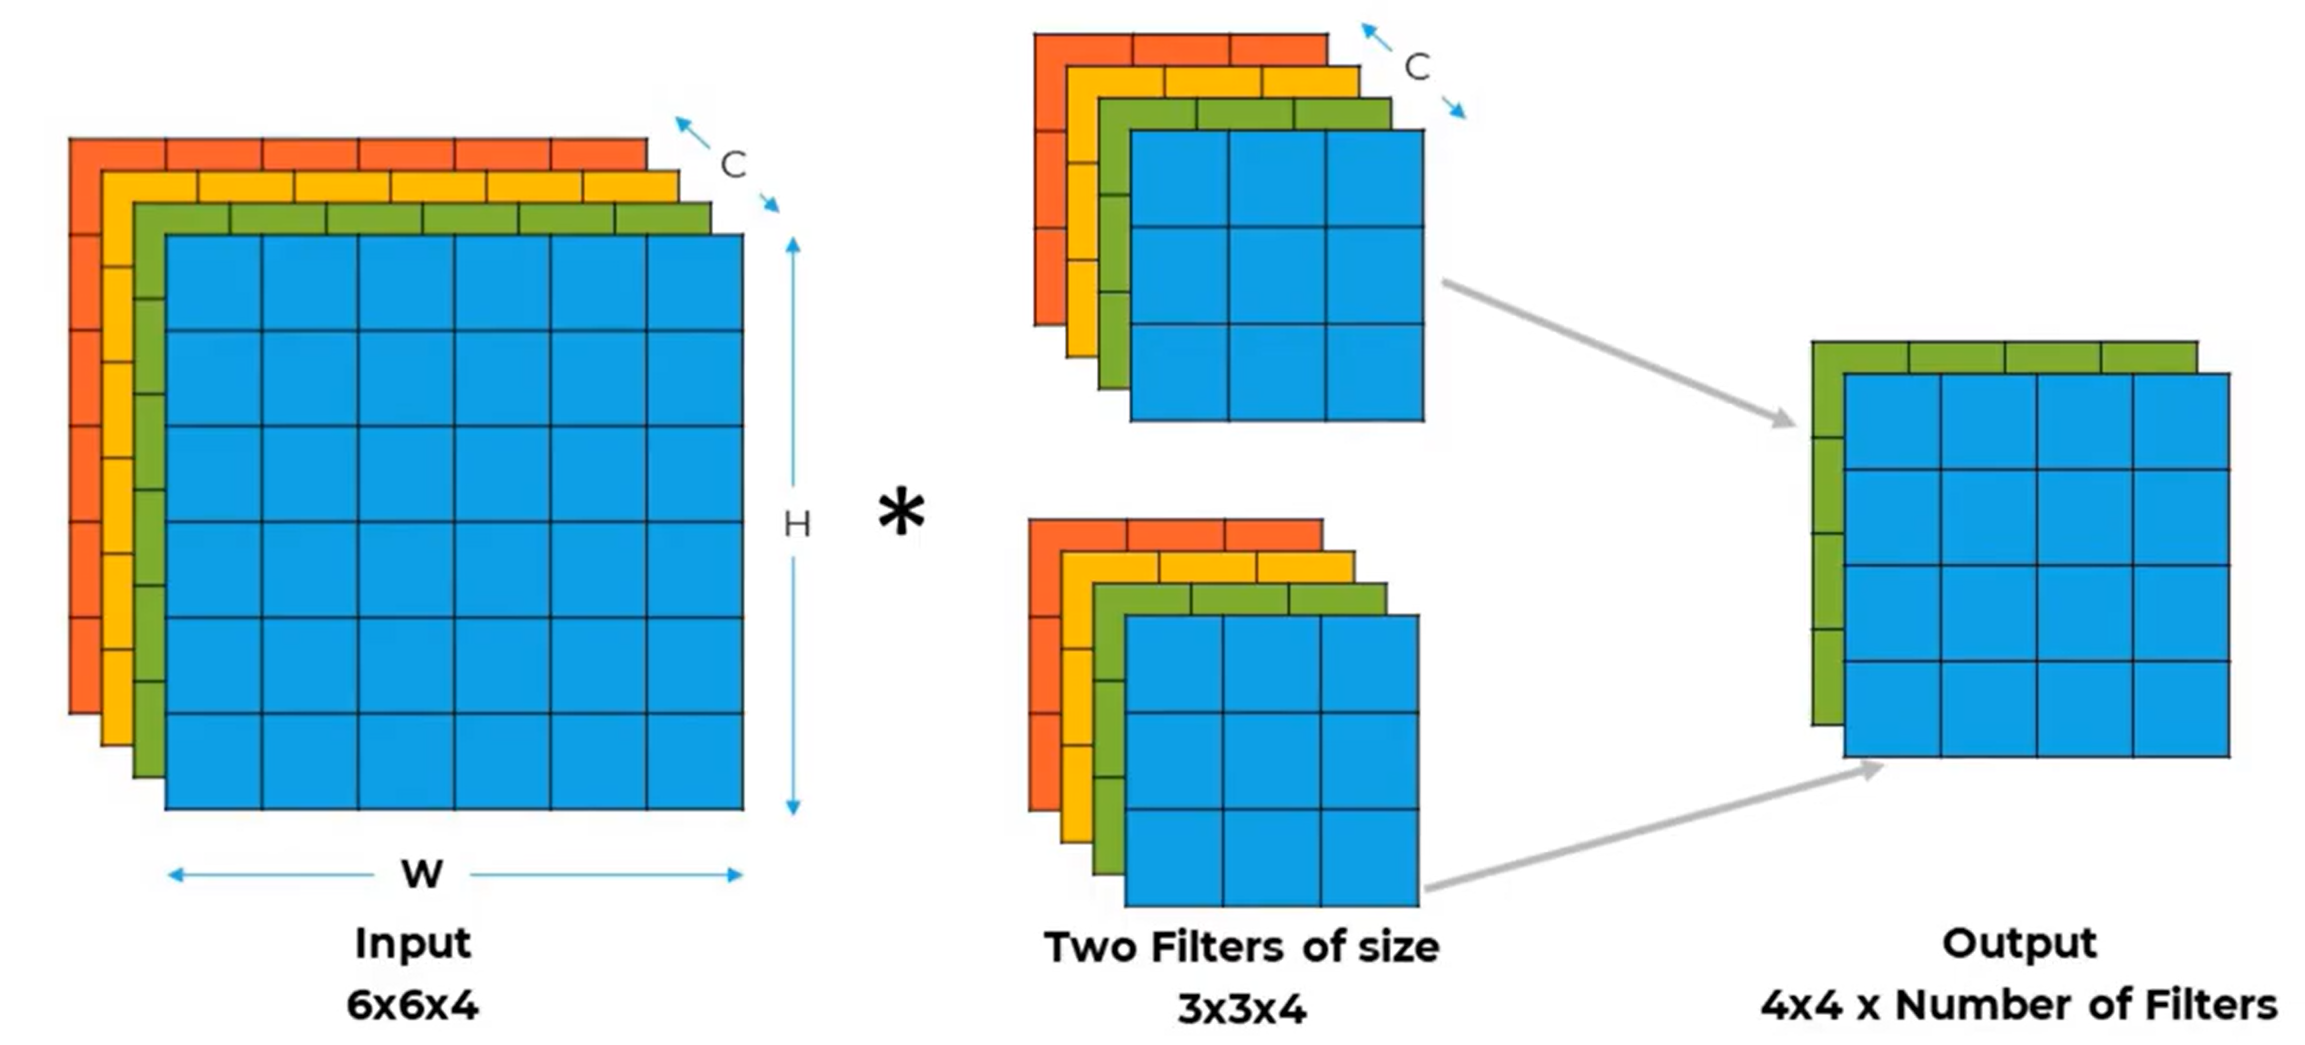

### 2.3. Cлой пулинга для матриц (MaxPool2d)
Также имеет ядро (kernel), гиперпараметры: **kernel size, padding, stride** - аналогичны сверточному слою. Операция пулинга (pooling - слияние в общую массу) похоже на свертку, но уже путем вычисления и взятия единственного значения из области на которой находится ядро. Например, взятия максимального (max pooling) или среднего (average pooling) по всем значениям внутри ядра. Функция пулинга - фильтрация самых явных признаков, отбрасывание незначительных, а также дополнительное снижение размерности входного тензора (уменьшение вычислительных затрат).

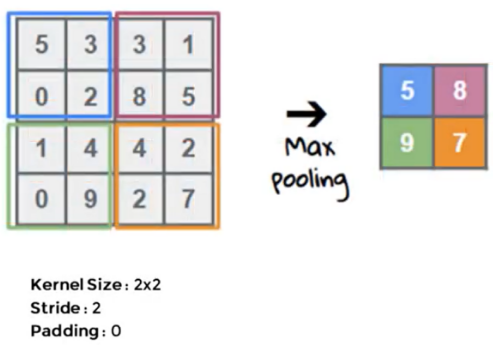

### 2.4. Нормализующий слой для матриц (BatchNorm2d)

Данные подаются в сеть батчами, т.е. 4-мерными тензорами с размерностью (N, C, H, W), где N - размер батча. Данный слой нормализует все значения по каждому из каналов (С - число каналов, или глубина) по "классической" схеме:

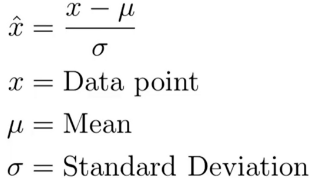

Процедура нормализации помогает добиться более стабильного обучения и препятсятвет переобучению. 
Обучаемая версия BatchNorm: два обучаемых (оптимизируемы в процессе обучения параметра): *γ* и *β*. Если при нормализации функция потерь будет расти, что постнепенно эти параметры будут приближатьсмя к среднему и стандартному отклонению соответственно и эффект такой "вредной" нормализации будет уменьшаться:

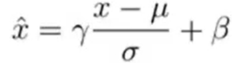


### 2.5 Слои функции активации (sigmoid, ReLU...)
Применение различных функций активации. В pytorch могут быть как в виде слоев, так и в виде явных функций, которые можно вызывать в нужном месте скрипта.

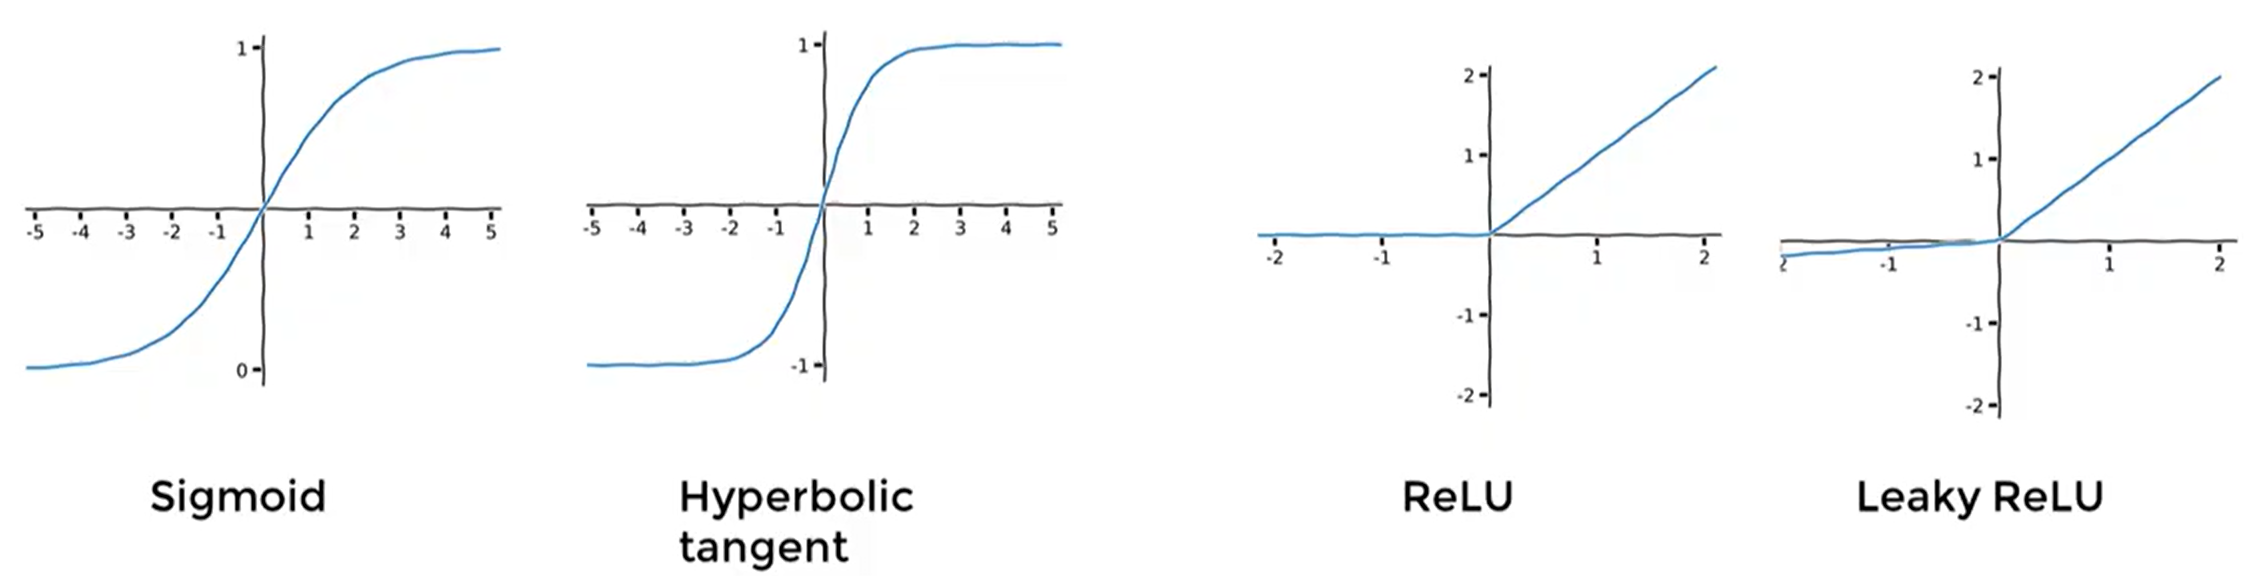

## 3. LeNet
### 3.1 Архитектура LeNet

Одна из первых успешных CNN-архитектур для распознавания рукописного текста (LeCunn, et al., 2008). Датасет MNIST - результат попыток решить данную задачу. Архитектура LeNet: "backbone" (=feature extractor) - два блока из сверточного и пулинг-слоя, "head" (=непосредственно сеть-классификатор) - трехслойный MLP (10 выходных нейронов по числу классов MNIST). Входной сверточный слой принимаеит изображение как есть - в виде матрицы. "Расплющивание" в вектор (flatten) - непосредственно перед подачей на MLP-head.

![img](lenet.png)

**Соберем в pytorch устовершенствованную версию LeNet:**
- ReLU вместо Sigmoid
- Добавлены batchnorm-слои

**Датасет: FashionMNIST**

<img src="https://www.learnopencv.com/wp-content/uploads/2021/01/c3-w3-fashion-mnist-sprite.jpg" width="600">

В FashionMNIST также 10 класов, Ч-Б изображения чуть больше размером (32х32). Каждый элемент данных в обучающей и проверочной выборке принадлежит к одному из классов:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

### 3.2 Реализация LeNet

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import time

from typing import Iterable
from dataclasses import dataclass

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms

In [2]:
# LeNet with batchnorm
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()

        # backbone (body)
        self._body = nn.Sequential(
            # conv layer-1: input size = (32, 32), output size = (28, 28)
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
            nn.BatchNorm2d(6),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2), # size (28, 28) --> (14, 14)
            
            # conv layer-2: input size = (14, 14), output size = (10, 10)
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            # output size = (5, 5)
        )
        
        # head
        self._head = nn.Sequential(
            # in_features = total number of weight in last conv layer = 16 * 5 * 5
            nn.Linear(in_features=16 * 5 * 5, out_features=120), 
            nn.ReLU(inplace=True),
            
            # in_features = output of last linear layer = 120 
            nn.Linear(in_features=120, out_features=84), 
            nn.ReLU(inplace=True),
            
            # in_features = output of last linear layer = 84
            # and out_features = number of classes = 10 (MNIST data 0-9)
            nn.Linear(in_features=84, out_features=10)
        )

    def forward(self, x):
        x = self._body(x)
        # flatten the output of conv layers
        # dimension should be batch_size * number_of weights_in_last conv_layer
        x = x.view(x.size()[0], -1)
        x = self._head(x)
        return x

In [3]:
lenet_model = LeNet()
print(lenet_model)

LeNet(
  (_body): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (_head): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


**Функция для загрузки и подготовки данных:**
- Набор трансформаций (использует pytorch-класс transforms): изменяем размер всех загружаемых изображений, переводим в тензорный вид и нормализуем по известным (предоставленым в описании дататсета среднему значению и стандартному отклонению, в данном случае - MNIST).
- Загрузчик обучающей выборки (использует общий pytorch-класс загрузчика torch.utils.data.DataLoader): определяется размер батча, обязательно перемешивание элементов, число потоков процессора для загрузки данных
- Загрузчик проверочной выборки (также использует общий pytorch-класс загрузчика): также размер батча, перемешивание отсутствует, число потоков процессора

Значения аргументов будут определены позже.

In [4]:
def get_data(batch_size, data_root='data', num_workers=1):
    
    train_test_transforms = transforms.Compose([
        transforms.Resize((32, 32)), # Resize initial 28x28 size to 32X32
        transforms.ToTensor(), # re-scales image values [0-255] to tensor values [0-1]
        transforms.Normalize((0.2860, ), (0.3530, ))  # subtract mean (0.2860), divide by variance (0.3530).
    ])
    
    # train dataloader
    train_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST(root=data_root, train=True, download=True, transform=train_test_transforms),
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers
    )
    
    # test dataloader
    test_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST(root=data_root, train=False, download=True, transform=train_test_transforms),
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers
    )
    return train_loader, test_loader

Класс-обертка для существенных параметров окружения и их значений:

In [7]:
@dataclass # т.н. "декоратор", подробности: https://realpython.com/primer-on-python-decorators/
class SystemConfiguration:
    '''
    Describes the common system setting needed for reproducible training
    '''
    seed: int = 42  # seed number to set the state of all random number generators
    cudnn_benchmark_enabled: bool = True  # enable CuDNN benchmark for the sake of performance
    cudnn_deterministic: bool = True  # make cudnn deterministic (reproducible training)

Аналогичный класс-обертка для существенных параметров процесса обучения:

In [8]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 32  # amount of data to pass through the network at each forward-backward iteration
    epochs_count: int = 10  # number of times the whole dataset will be passed through the network
    learning_rate: float = 0.01  # determines the speed of network's weights update
    log_interval: int = 100  # how many batches to wait between logging training status
    test_interval: int = 1  # how many epochs to wait before another test. Set to 1 to get val loss at each epoch
    data_root: str = "data"  # folder to save MNIST data (default: data)
    num_workers: int = 10  # number of concurrent processes used to prepare data
    device: str = "cuda"  # device to use for training.

Функция для для доступа и изменения параметров окружения:

In [9]:
def setup_system(system_config: SystemConfiguration) -> None:
    torch.manual_seed(system_config.seed)
    if torch.cuda.is_available():
        torch.backends.cudnn_benchmark_enabled = system_config.cudnn_benchmark_enabled
        torch.backends.cudnn.deterministic = system_config.cudnn_deterministic

Функция определяющая ход обучения, принимает аргуемнтами:
- имя класса-обертки с параметрами процесса обучения
- имена компонентов алгоритма обучения (загрузчики, комопненты сети, оптимизатор...)
- аргумент числа эпох (int)

In [10]:
def train(
    train_config: TrainingConfiguration, model: nn.Module, optimizer: torch.optim.Optimizer,
    train_loader: torch.utils.data.DataLoader, epoch_idx: int
) -> None:
    
    model.train() # model in training mode
    batch_loss = np.array([])
    batch_acc = np.array([])
        
    for batch_idx, (data, target) in enumerate(train_loader):
        
        indx_target = target.clone() # clone target
        data = data.to(train_config.device)  # send data to device
        target = target.to(train_config.device) # send target to device
 
        optimizer.zero_grad() # reset parameters gradient to zero
        output = model(data) # forward pass to the model
        loss = F.cross_entropy(output, target) # cross entropy loss
        
        loss.backward() # find gradients w.r.t training parameters
        optimizer.step() # Update parameters using gradients
        
        batch_loss = np.append(batch_loss, [loss.item()]) # accumulate the loss on each batch
        
        prob = F.softmax(output, dim=1) # get probability score using soft
        pred = prob.data.max(dim=1)[1]  # get the index of the max probability
                        
        correct = pred.cpu().eq(indx_target).sum() # correct prediction
        acc = float(correct) / float(len(data)) # accuracy
        batch_acc = np.append(batch_acc, [acc]) # # accumalate the accuracy on the current batch

        if batch_idx % train_config.log_interval == 0 and batch_idx > 0:              
            print(
                'Train Epoch: {} [{}/{}] Loss: {:.6f} Acc: {:.4f}'.format(
                    epoch_idx, batch_idx * len(data), len(train_loader.dataset), loss.item(), acc
                )
            )
            
    epoch_loss = batch_loss.mean()
    epoch_acc = batch_acc.mean()
    return epoch_loss, epoch_acc

Аналогичная функция, определяющая процедуру проверки:

In [11]:
def validate(
    train_config: TrainingConfiguration,
    model: nn.Module,
    test_loader: torch.utils.data.DataLoader,
) -> float:

    model.eval()
    test_loss = 0
    count_corect_predictions = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            
            indx_target = target.clone()
            data = data.to(train_config.device)
            target = target.to(train_config.device)
            
            output = model(data) 
            
            test_loss += F.cross_entropy(output, target).item() # add loss for each batch
            prob = F.softmax(output, dim=1) # get probs with softmax
            pred = prob.data.max(dim=1)[1] # get the index of the max prob
            count_corect_predictions += pred.cpu().eq(indx_target).sum() # add correct prediction count

        test_loss = test_loss / len(test_loader) # average over number of batches 
        accuracy = 100. * count_corect_predictions / len(test_loader.dataset) # average over number of dataset

        print(
            '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
                test_loss, count_corect_predictions, len(test_loader.dataset), accuracy
            )
        )
    return test_loss, accuracy/100.0

### Основной цикл обучения (main loop)

- Устанавлениваем параметры окружения (CPU/GPU, число потоков процессора и т.д.)
- Загружаем данные при помощи Загрузчиков
- Созадаем экземпляр модели LeNet по ваыше описанному классу
- Указываем какой оптимизатор использовать
- Устанавливаем периоды отслеживания loss и accuracy

In [12]:
def main(
    model, 
    system_configuration=SystemConfiguration(), 
    training_configuration=TrainingConfiguration()
):
    setup_system(system_configuration) # system configuration as setted above

    # training configuration set the parameters:
    batch_size_to_set = training_configuration.batch_size # batch size
    num_workers_to_set = training_configuration.num_workers # num_workers
    epoch_num_to_set = training_configuration.epochs_count # epochs

    # if GPU is available use training config, else lower batch_size, num_workers, epochs
    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
        batch_size_to_set = 16
        num_workers_to_set = 2
        epoch_num_to_set = 10

    # data loader
    train_loader, test_loader = get_data(
        batch_size=batch_size_to_set,
        data_root=training_configuration.data_root,
        num_workers=num_workers_to_set
    )
    
    # Update training configuration
    training_configuration = TrainingConfiguration(
        device=device,
        epochs_count=epoch_num_to_set,
        batch_size=batch_size_to_set,
        num_workers=num_workers_to_set
    )
        
    # send model to device (GPU/CPU)
    model.to(training_configuration.device)

    # optimizer
    optimizer = optim.SGD(
        model.parameters(),
        lr=training_configuration.learning_rate
    )

    best_loss = torch.tensor(np.inf) # infinity
    
    # arrays for storing the values per epoch
    epoch_train_loss = np.array([])
    epoch_test_loss = np.array([])
    epoch_train_acc = np.array([])
    epoch_test_acc = np.array([])
   
    t_begin = time.time()  # trainig time measurement
    for epoch in range(training_configuration.epochs_count):
        
        train_loss, train_acc = train(training_configuration, model, optimizer, train_loader, epoch)
        epoch_train_loss = np.append(epoch_train_loss, [train_loss])
        epoch_train_acc = np.append(epoch_train_acc, [train_acc])

        elapsed_time = time.time() - t_begin
        speed_epoch = elapsed_time / (epoch + 1)
        speed_batch = speed_epoch / len(train_loader)
        eta = speed_epoch * training_configuration.epochs_count - elapsed_time
        
        print(
            "Elapsed {:.2f}s, {:.2f} s/epoch, {:.2f} s/batch, ets {:.2f}s".format(
                elapsed_time, speed_epoch, speed_batch, eta
            )
        )

        if epoch % training_configuration.test_interval == 0:
            
            current_loss, current_accuracy = validate(training_configuration, model, test_loader)
            epoch_test_loss = np.append(epoch_test_loss, [current_loss])
            epoch_test_acc = np.append(epoch_test_acc, [current_accuracy])
            
            if current_loss < best_loss:
                best_loss = current_loss
                
    print("Total time: {:.2f}, Best Loss: {:.3f}".format(time.time() - t_begin, best_loss))
    
    return model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc

### Запуск main loop

In [13]:
model = LeNet()
model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc = main(model)

Train Epoch: 0 [3200/60000] Loss: 1.894394 Acc: 0.5312
Train Epoch: 0 [6400/60000] Loss: 1.138996 Acc: 0.6250
Train Epoch: 0 [9600/60000] Loss: 1.035882 Acc: 0.6875
Train Epoch: 0 [12800/60000] Loss: 0.800144 Acc: 0.6250
Train Epoch: 0 [16000/60000] Loss: 0.670873 Acc: 0.7812
Train Epoch: 0 [19200/60000] Loss: 0.640858 Acc: 0.8125
Train Epoch: 0 [22400/60000] Loss: 0.543036 Acc: 0.8438
Train Epoch: 0 [25600/60000] Loss: 0.618021 Acc: 0.7812
Train Epoch: 0 [28800/60000] Loss: 0.523813 Acc: 0.7812
Train Epoch: 0 [32000/60000] Loss: 0.453515 Acc: 0.8438
Train Epoch: 0 [35200/60000] Loss: 0.633612 Acc: 0.6875
Train Epoch: 0 [38400/60000] Loss: 0.448396 Acc: 0.8125
Train Epoch: 0 [41600/60000] Loss: 0.445957 Acc: 0.8438
Train Epoch: 0 [44800/60000] Loss: 0.581493 Acc: 0.8438
Train Epoch: 0 [48000/60000] Loss: 0.591415 Acc: 0.7500
Train Epoch: 0 [51200/60000] Loss: 0.334934 Acc: 0.8750
Train Epoch: 0 [54400/60000] Loss: 0.482380 Acc: 0.8125
Train Epoch: 0 [57600/60000] Loss: 0.472847 Acc: 0.

Train Epoch: 7 [22400/60000] Loss: 0.226756 Acc: 0.8750
Train Epoch: 7 [25600/60000] Loss: 0.308187 Acc: 0.8750
Train Epoch: 7 [28800/60000] Loss: 0.223284 Acc: 0.9375
Train Epoch: 7 [32000/60000] Loss: 0.380762 Acc: 0.8438
Train Epoch: 7 [35200/60000] Loss: 0.327311 Acc: 0.9062
Train Epoch: 7 [38400/60000] Loss: 0.440787 Acc: 0.7812
Train Epoch: 7 [41600/60000] Loss: 0.224600 Acc: 0.9375
Train Epoch: 7 [44800/60000] Loss: 0.152801 Acc: 0.9062
Train Epoch: 7 [48000/60000] Loss: 0.228174 Acc: 0.9375
Train Epoch: 7 [51200/60000] Loss: 0.148458 Acc: 0.9688
Train Epoch: 7 [54400/60000] Loss: 0.150287 Acc: 0.9688
Train Epoch: 7 [57600/60000] Loss: 0.134921 Acc: 0.9688
Elapsed 174.35s, 21.79 s/epoch, 0.01 s/batch, ets 43.59s

Test set: Average loss: 0.3038, Accuracy: 8896/10000 (89%)

Train Epoch: 8 [3200/60000] Loss: 0.348421 Acc: 0.8750
Train Epoch: 8 [6400/60000] Loss: 0.309393 Acc: 0.8750
Train Epoch: 8 [9600/60000] Loss: 0.262075 Acc: 0.8750
Train Epoch: 8 [12800/60000] Loss: 0.178439 A

### 20 эпох:
- на GPU (RTX 3070 notebook) = 336 сек
- на СPU (Intel i7) = 397 сек

### Графики loss и accuracy
Используем накопленные в списках данные loss и accuracy для построения графиков:

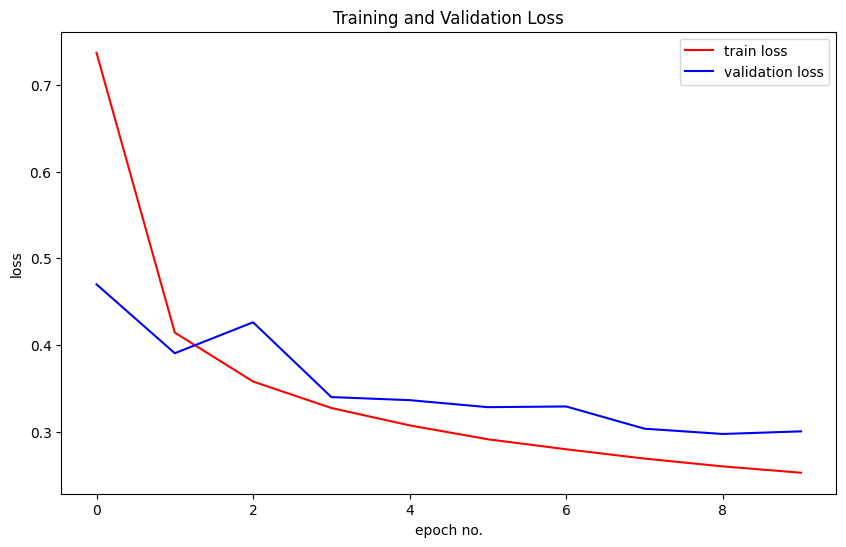

In [14]:
# Plot loss
plt.rcParams["figure.figsize"] = (10, 6)
x = range(len(epoch_train_loss))

plt.figure
plt.plot(x, epoch_train_loss, 'r', label="train loss")
plt.plot(x, epoch_test_loss, 'b', label="validation loss")

plt.xlabel('epoch no.')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()